In [1]:
import tensorflow as tf

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
mnist.train.num_examples

55000

In [11]:
mnist.test.num_examples

10000

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
mnist.train.images[1].shape

(784,)

In [17]:
single_image = mnist.train.images[1].reshape(28, 28)

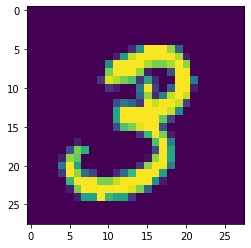

In [18]:
plt.imshow(single_image)

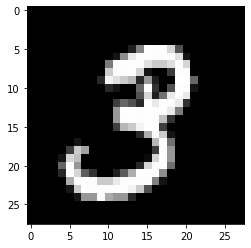

In [20]:
plt.imshow(single_image, cmap='gist_gray')

In [38]:
# placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])

In [39]:
# variables
w = tf.Variable(tf.zeros((784, 10)))
b = tf.Variable(tf.zeros((10)))

In [40]:
# create graph operation
y = tf.matmul(x, w) + b

In [41]:
# loss function
y_true = tf.placeholder(tf.float32, shape=[None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [42]:
# optimizr
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [43]:
# create session
init = tf.global_variables_initializer()

In [51]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x: batch_x, y_true:batch_y})
    
    # evaluate the model
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    print(correct_prediction)
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print(sess.run(acc, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

Tensor("Equal_13:0", shape=(?,), dtype=bool)
0.9187
